Rozpocznijmy od podstawowych importów oraz wczytania danych

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv('data/diabetes.csv')

# Proces przetwarzania danych

Spójrzmy na to jak wyglądają przykładowe wiersze z datasetu


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Przyjrzyjmy się opisom poszczególnych kolumn:
<ul>
<li>Pregnancies - liczba ciąż </li>
<li>Glucose - test tolerancji glukozy </li>
<li>BloodPressure - rozkurczowe ciśnienie krwi (mm Hg) </li>
<li>SkinThickness - grubość fałdu skóry na tricepsie (mm) </li>
<li>Insulin - poziom insuliny we krwi po 2 godzinnym teście tolerancji (U/ml)</li>
<li>BMI - wartość indeksu BMI </li>
<li>DiabetesPedigreeFunction - funkcja określająca genetyczne predyspozycje do zachorowania na cukrzycę </li>
<li>Age - wiek </li>
<li> Outcome - diagnoza </li>
</ul> 

Przyjrzyjmy się typom danych w poszczególnych kolumnach


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Widzimy, że wszystkie dane są typu liczbowe, nie ma w nich żadnych NaNów

Sprawdźmy czy w niektórych kolumnach występują 0. 0 nie mogą wystąpić w kolumnach `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` oraz `BMI`.

In [ ]:
data[data.Glucose == 0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [ ]:
data[data.BloodPressure == 0].count()

Pregnancies                 35
Glucose                     35
BloodPressure               35
SkinThickness               35
Insulin                     35
BMI                         35
DiabetesPedigreeFunction    35
Age                         35
Outcome                     35
dtype: int64

In [ ]:
data[data.SkinThickness == 0].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [ ]:
data[data.Insulin == 0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [ ]:
data[data.BMI == 0].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

Widzimy zatem, że w każdej z tych kolumn znajdują się wartości równe 0, co nie powinno mieć miejsca. Zatem należy je uzupełnić.

Zastąpmy wartości 0 w powyższych kolumnach NaNami, w celu uproszczenia dalszego przetwarzania danych

In [ ]:
data['Glucose'].replace(0, np.nan, inplace=True)
data['BloodPressure'].replace(0, np.nan, inplace=True)
data['SkinThickness'].replace(0, np.nan, inplace=True)
data['Insulin'].replace(0, np.nan, inplace=True)
data['BMI'].replace(0, np.nan, inplace=True)

Zacznijmy od uzupełnienia kolumny `BMI`. Brakujące wartości uzupełnijmy średnią wartością `BMI`.

In [ ]:
data['BMI'].fillna(value=data['BMI'].mean(), inplace=True)

Podzielmy BMI na pewne grupy:
 <ul>
<li>BMI < 18.5 - niedowaga </li>
<li>BMI < 25 && BMI >= 18.5 - waga prawdidlowa </li>
<li>BMI < 30 && BMI >= 25 -  nadwaga </li>
<li>BMI >= 30 - otyłość </li>
</ul> 

Zmapujmy wartości BMI na wartości z grup

In [ ]:
def mapBMI(x):
    if (x < 18.5):
        return 0
    elif (x < 25):
        return 1
    elif (x < 30):
        return 2
    else:
        return 3
    
data['BMI'] = data['BMI'].map(lambda x: mapBMI(x))

Kolumny `Glucose` oraz `BloodPressure` wypełnijmy wartościami średnimi dla danej kolumny

In [ ]:
data['Glucose'].fillna(value=data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(value=data['BloodPressure'].mean(), inplace=True)

Zauważmy, że występuje dość znaczna korelacja między `BMI` a `SkinThickness`.

In [ ]:
data['BMI'].corr(data['SkinThickness'])

0.5565621019235744

Zatem uzupełnijmy `SkinThickness` na podstawie `BMI`. Przypiszmy brakującym wartościom z `SkinThickness` wartości średnie dla danej grupy `BMI`.

In [ ]:
data[['BMI', 'SkinThickness']].groupby(['BMI']).mean()

,SkinThickness
BMI,
0,17.000000
1,17.600000
2,23.220472
3,33.332386


In [ ]:
data.SkinThickness.loc[data.SkinThickness.isnull() & (data['BMI'] == 0)] = 17.000000
data.SkinThickness.loc[data.SkinThickness.isnull() & (data['BMI'] == 1)] = 17.600000
data.SkinThickness.loc[data.SkinThickness.isnull() & (data['BMI'] == 2)] = 23.220472
data.SkinThickness.loc[data.SkinThickness.isnull() & (data['BMI'] == 3)] = 33.332386

Podzielmy teraz `Glucose` na kilka grup

In [ ]:
data['Glucose'] = pd.qcut(data.Glucose, 7, labels=[0, 1, 2, 3, 4, 5, 6]).astype(int)

Zauważmy, że występuje dość znaczna korelacja między `Glucose` a `Insulin`.

In [ ]:
data['Glucose'].corr(data['Insulin'])

0.5606310696413963

Zatem uzupełnijmy `Insulin` na podstawie `Glucose`. Przypiszmy brakującym wartościom z `Insulin` wartości średnie dla danej grupy `Glucose`.

In [ ]:
data[['Glucose', 'Insulin']].groupby(['Glucose']).mean()

,Insulin
Glucose,
0,59.655172
1,98.794118
2,129.146341
3,134.660377
4,179.859649
5,222.806452
6,265.636364


In [ ]:
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 0)] = 17.000000
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 1)] = 98.794118
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 2)] = 129.146341
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 3)] = 134.660377
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 4)] = 179.859649
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 5)] = 222.806452
data.Insulin.loc[data.Insulin.isnull() & (data['Glucose'] == 6)] = 265.636364

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,5,72.0,35.0,222.806452,3,0.627,50,1
1,1,0,66.0,29.0,17.000000,2,0.351,31,0
2,8,6,64.0,17.6,265.636364,1,0.672,32,1
3,1,0,66.0,23.0,94.000000,2,0.167,21,0
4,0,5,40.0,35.0,168.000000,3,2.288,33,1


Na tym kończy się proces przetwarzania danych

Podsumujmy przetwarzanie danych paroma wykresami

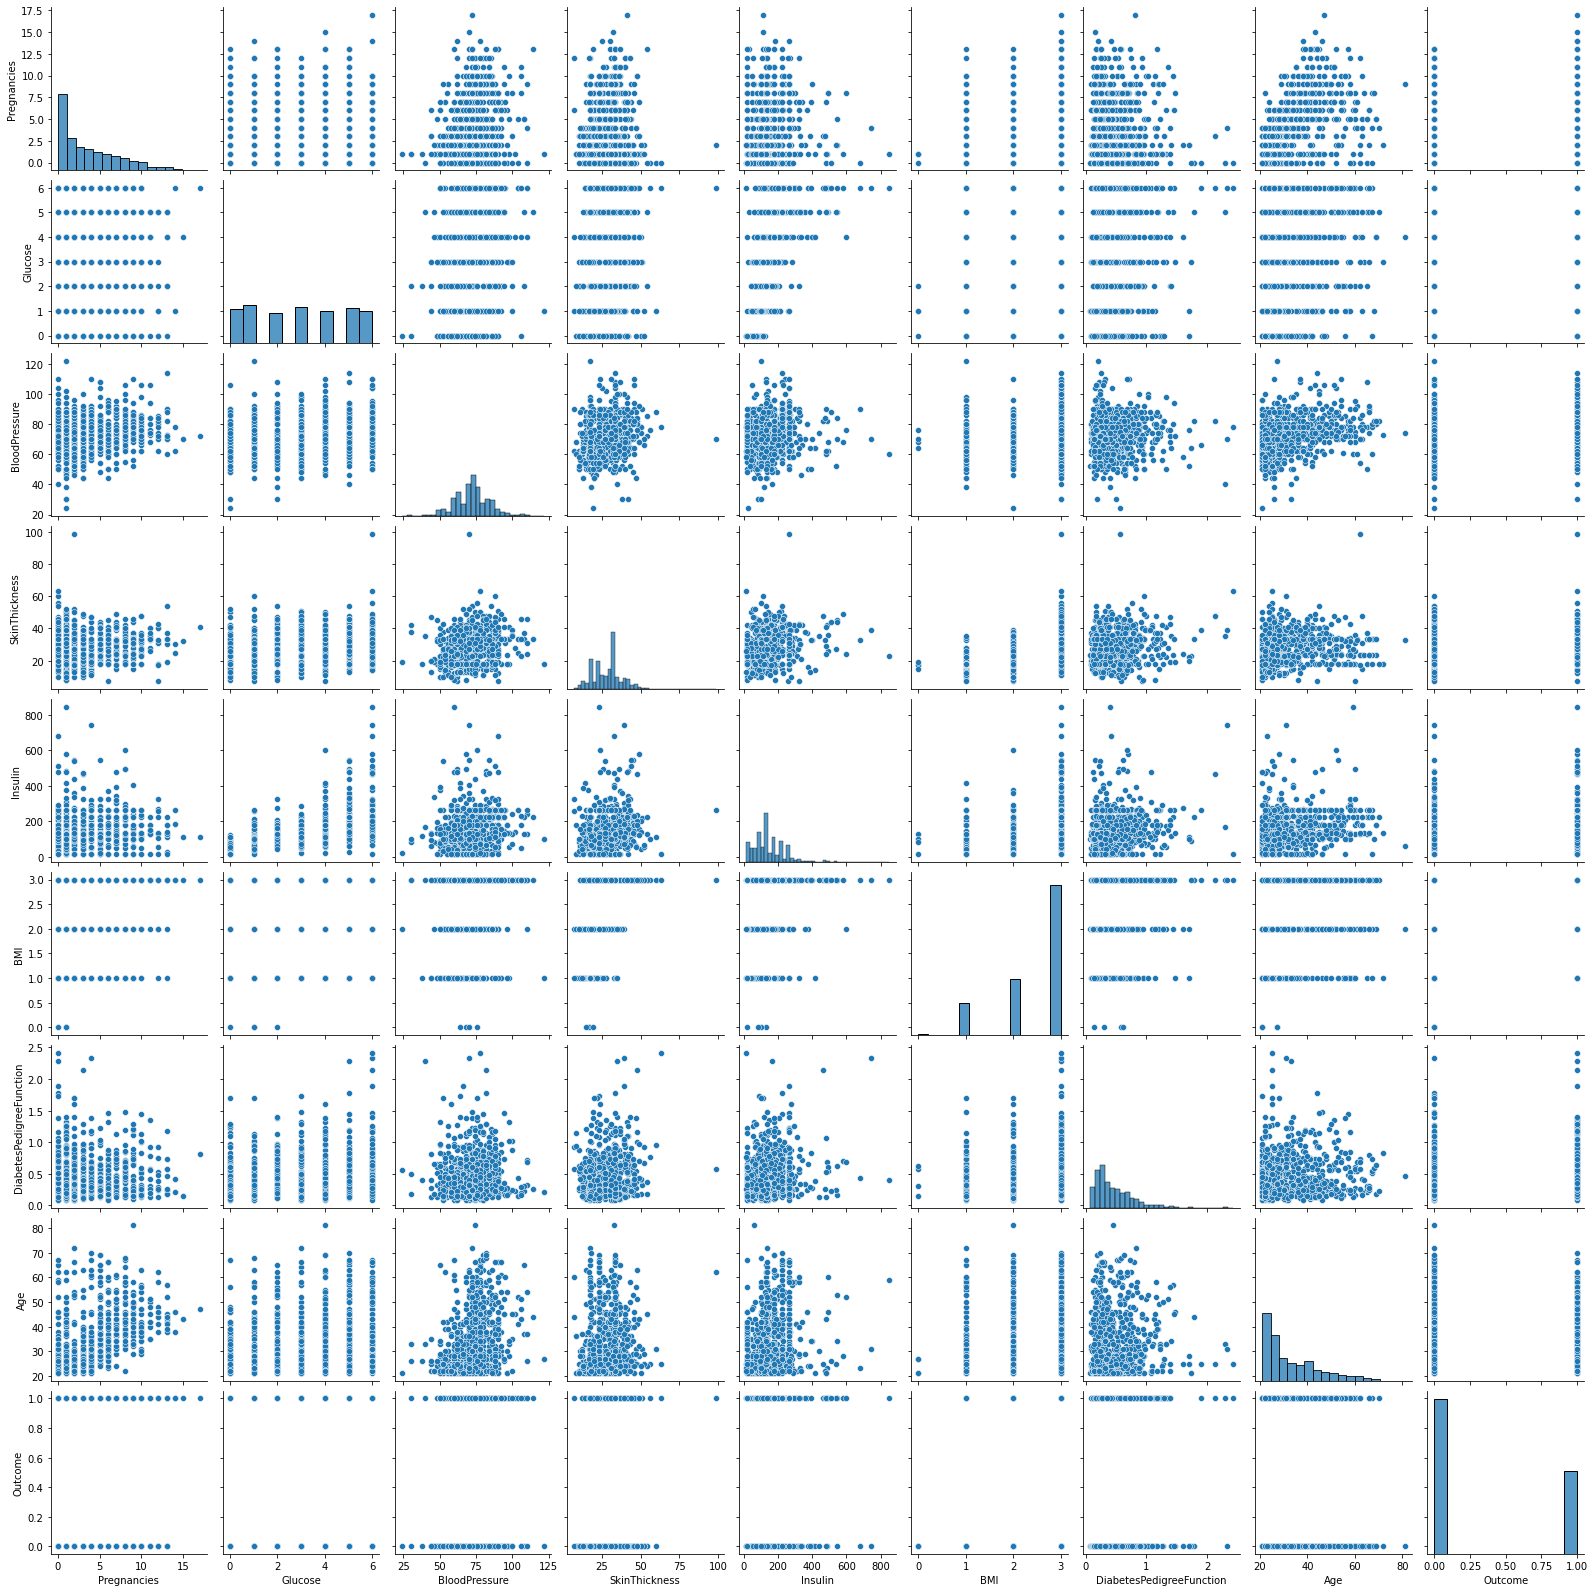

In [ ]:
import seaborn as sns

sns.pairplot(data)
plt.show()

In [ ]:
corr = data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136406,0.208522,0.091946,0.063465,0.088276,-0.033523,0.544341,0.221898
Glucose,0.136406,1.000000,0.232882,0.200741,0.697869,0.209406,0.111583,0.274608,0.477176
BloodPressure,0.208522,0.232882,1.000000,0.200208,0.140082,0.206309,-0.002763,0.324595,0.166074
SkinThickness,0.091946,0.200741,0.200208,1.000000,0.187504,0.635533,0.117867,0.099979,0.271806
Insulin,0.063465,0.697869,0.140082,0.187504,1.000000,0.216809,0.122262,0.199409,0.344718
BMI,0.088276,0.209406,0.206309,0.635533,0.216809,1.000000,0.101863,0.067453,0.309762
DiabetesPedigreeFunction,-0.033523,0.111583,-0.002763,0.117867,0.122262,0.101863,1.000000,0.033561,0.173844
Age,0.544341,0.274608,0.324595,0.099979,0.199409,0.067453,0.033561,1.000000,0.238356
Outcome,0.221898,0.477176,0.166074,0.271806,0.344718,0.309762,0.173844,0.238356,1.000000


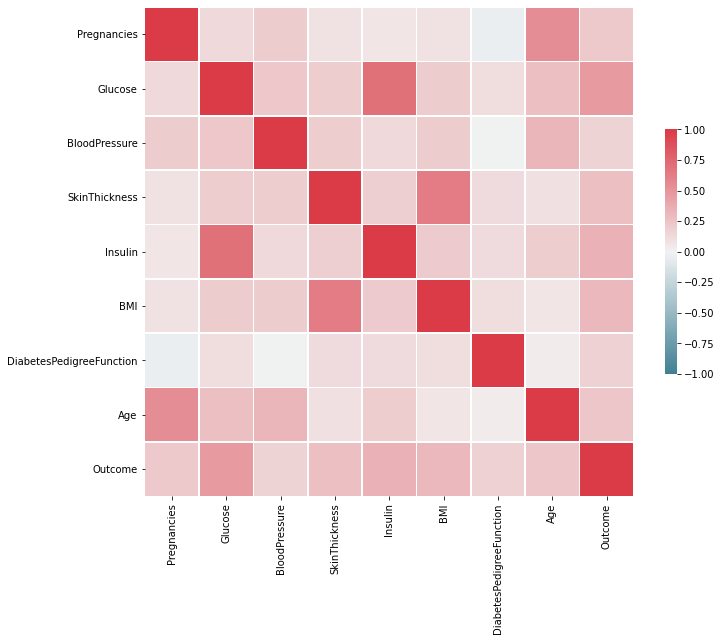

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Proces modelowania

Na początku podzielmy dane na zbiory `train` oraz `test`. Z powodu niewielkiego rozmiaru danych, zdecydowano się na wykorzystanie znacznej częsci zbioru jako `train`.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != "Outcome"]
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [ ]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,5,78.000000,29.000000,126.000000,3,0.692,54
118,4,1,60.000000,23.000000,98.794118,2,0.443,22
247,0,6,90.000000,33.000000,680.000000,3,0.427,23
157,1,2,56.000000,21.000000,135.000000,2,0.833,23
468,8,3,72.405184,33.332386,134.660377,3,0.183,38


In [ ]:
y_train.head()

603    1
118    0
247    0
157    0
468    1
Name: Outcome, dtype: int64

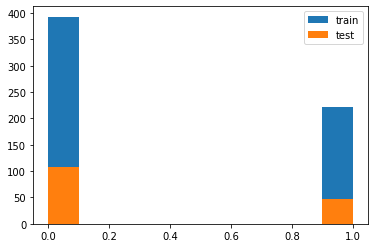

In [ ]:
plt.hist(y_train, label="train")
plt.hist(y_test, label="test")
plt.legend()
plt.show()

Przy pomocy `GridSearcha` dobierzmy najlepsze parametry do następujących modeli:
<ul>
    <li>Logistic Regression </li>
    <li>Linear SVM </li>
    <li> Polynomial SVM</li>
    <li> RBF SVM </li>
    <li> LinearSVC </li>
    <li> Decision Trees Classifier</li>
    <li> Bagging Classifier</li>
    <li> Random Forest Classifier</li>
    <li> Extra Trees Classifier</li>
    <li> Ada Boost Classifier </li>
    <li> Gradient Boosting Classifier </li>
    <li> MLP Classifier </li>
</ul>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

Logistic Regression

In [ ]:
pipeline_1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipeline_1, param_grid_1, cv=kfold, return_train_score=True) 
grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.1, 'preprocessing': None}

Linear SVM

In [ ]:
pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_2 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.1, 1, 10]
}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 1,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Polynomial SVM

In [ ]:
pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))]) 

param_grid_3 = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.01, 0.1, 1, 10],
              'classifier__coef0': [0.01, 0.1, 1, 10],
             'classifier__degree': [1, 2, 3, 4, 5]}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.01,
 'classifier__coef0': 10,
 'classifier__degree': 3,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

RBF SVM

In [ ]:
pipeline4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.01, 0.1, 1, 10],
            'classifier__C': [0.01, 0.1, 1, 10]
}

grid_4 = GridSearchCV(pipeline4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 1,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

LinearSVC

In [ ]:
pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.01, 0.1, 1, 10]
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__C': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Decision Trees Classifier

In [ ]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 5,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Bagging Classifier

In [ ]:
pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_samples' : [0.1, 0.2, 0.5, 1]
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_samples': 0.2, 'preprocessing': None}

Random Forest Classifier

In [ ]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__max_leaf_nodes': 8,
 'classifier__n_estimators': 10,
 'preprocessing': None}

Extra Trees Classifier

In [ ]:
pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', ExtraTreesClassifier(n_jobs=-1))])

param_grid_9 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__max_leaf_nodes': 16,
 'classifier__n_estimators': 50,
 'preprocessing': None}

Ada Boost Classifier 

In [ ]:
pipeline_10 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_10 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 50, 100, 500],
            'classifier__learning_rate' : [0.01, 0.1, 0.5, 1],
}

grid_10 = GridSearchCV(pipeline_10, param_grid_10, cv=kfold, return_train_score=True)

grid_10.fit(X_train, y_train)
grid_10.best_params_

{'classifier__learning_rate': 0.01,
 'classifier__n_estimators': 500,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Gradient Boosting Classifier

In [ ]:
pipeline_11 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_11 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100],
            'classifier__learning_rate' : [0.01, 0.1, 0.5,1],
}

grid_11 = GridSearchCV(pipeline_11, param_grid_11, cv=kfold, return_train_score=True)

grid_11.fit(X_train, y_train)
grid_11.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

MLP Classifier

In [ ]:
pipeline_12 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_12 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16,32],
}

grid_12 = GridSearchCV(pipeline_12, param_grid_12, cv=kfold, return_train_score=True)

grid_12.fit(X_train, y_train)
grid_12.best_params_

{'classifier__batch_size': 32,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.1,
 'classifier__max_iter': 500,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Porównajmy teraz te modele

In [ ]:
from sklearn import  metrics

models = []
models.append(('Logistic Regression', grid_1.best_estimator_))
models.append(('Linear SVM', grid_2.best_estimator_))
models.append(('Polynomial SVM', grid_3.best_estimator_))
models.append(('RBF SVM', grid_4.best_estimator_))
models.append(('LinearSVC', grid_5.best_estimator_))
models.append(('Decision Trees Classifier', grid_6.best_estimator_))
models.append(('Bagging Classifier', grid_7.best_estimator_))
models.append(('Random Forest Classifier', grid_8.best_estimator_))
models.append(('Extra Trees Classifier', grid_9.best_estimator_))
models.append(('Ada Boost Classifier', grid_10.best_estimator_))
models.append(('Gradient Boosting Classifier', grid_11.best_estimator_))
models.append(('MLP Classifier', grid_12.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

In [ ]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['Logistic Regression', 'Linear SVM', 'Polynomial SVM', 'RBF SVM', 'LinearSVC', 
  'Decision Trees Classifier', 'Bagging Classifier', 'Random Forest Classifier', 
  'Extra Trees Classifier', 'Ada Boost Classifier', 'Gradient Boosting Classifier', 'MLP Classifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,Logistic Regression,0.673913,0.659574,0.666667,0.798701
1,Linear SVM,0.659091,0.617021,0.637363,0.785714
2,Polynomial SVM,0.651163,0.595745,0.622222,0.779221
3,RBF SVM,0.659091,0.617021,0.637363,0.785714
4,LinearSVC,0.674419,0.617021,0.644444,0.792208
5,Decision Trees Classifier,0.641026,0.531915,0.581395,0.766234
6,Bagging Classifier,0.636364,0.595745,0.615385,0.772727
7,Random Forest Classifier,0.709677,0.468085,0.564103,0.779221
8,Extra Trees Classifier,0.764706,0.553191,0.641975,0.811688
9,Ada Boost Classifier,0.710526,0.574468,0.635294,0.798701


Zbudujmy własny model

In [80]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(
    Dense(32, kernel_initializer='uniform', activation='relu', input_dim=8))
model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=32, epochs=350)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_47 (Dense)             (None, 20)                660       
_________________________________________________________________
dense_48 (Dense)             (None, 6)                 126       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 7         
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/350
20/20 [==============================] - 1s 2ms/step - loss: 2.3737 - accuracy: 0.6493
Epoch 2/350
20/20 [==============================] - 0s 2ms/step - loss: 0.9789 - accuracy: 0.6300
Epoch 3/350
20/20 [==============================] 

In [81]:
print(metrics.accuracy_score(y_true=y_test, y_pred=model.predict_classes(X_test)))

0.8116883116883117


# Podsumowanie

Pomimo stosunkowo niewielkiej liczby wierszy w zbiorze danych oraz niekompletności pewnych kolumn (w niektórych brakowało nawet 30% danych) wszystkie modele osiągnęły zadowalający wynik. Zbudowany przeze mnie model wykazał jeden z najwyższych wyników `accuracy_score` spośród wszystkich modeli. NIewykluczone, że gdyby przy pomocy `GridSearcha` przetestować więcej parametrów, to proste modele osiągnęłyby znacznie lepsze wyniki.